In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('health-facilities-gh.csv')

In [3]:
df.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 8 columns):
Region          3756 non-null object
District        3756 non-null object
FacilityName    3756 non-null object
Type            3756 non-null object
Town            3603 non-null object
Ownership       3756 non-null object
Latitude        3732 non-null float64
Longitude       3732 non-null float64
dtypes: float64(2), object(6)
memory usage: 234.8+ KB


## Buat DataFrame Yang Menampilkan Jumlah unik value tiap tiap kolom

In [5]:
# kolom = df.columns

In [6]:
# uniq = df.nunique().values

In [7]:
data = {
    'kolom' : df.columns,
    'jumlah_unik_value' : df.nunique().values
}

In [8]:
pd.DataFrame(data)

,kolom,jumlah_unik_value
0,Region,10
1,District,171
2,FacilityName,3544
3,Type,25
4,Town,2446
5,Ownership,12
6,Latitude,2845
7,Longitude,2835


### Tampilkan Lima data region,district,type,town dan ownership terbanyak

In [9]:
print('5 Data Region Terbanyak')
print(df.Region.value_counts().head())

5 Data Region Terbanyak
Ashanti          658
Greater Accra    504
Western          496
Volta            398
Eastern          393
Name: Region, dtype: int64


In [10]:
kolom = 'Region District Type Town Ownership'.split(' ')
for item in kolom:
    print('5 Data {} Terbanyak'.format(item))
    print(df[item].value_counts().head())
    print()

5 Data Region Terbanyak
Ashanti          658
Greater Accra    504
Western          496
Volta            398
Eastern          393
Name: Region, dtype: int64

5 Data District Terbanyak
Accra Metropolitan     277
Kumasi Metropolitan    263
Tema Metropolitan      118
Shama Ahanta East       71
Ho Municipal            51
Name: District, dtype: int64

5 Data Type Terbanyak
Clinic            1171
Health Centre      786
CHPS               652
Maternity Home     369
Hospital           277
Name: Type, dtype: int64

5 Data Town Terbanyak
Sunyani      29
Koforidua    17
Berekum      16
Osu          15
Ho           15
Name: Town, dtype: int64

5 Data Ownership Terbanyak
Government          2210
Private             1179
CHAG                 257
Quasi-Government      91
government             6
Name: Ownership, dtype: int64



### Buat DataFrame Seperti Dibawah

In [11]:
Town = df.Town.unique()
MeanLat = []
MeanLong = []
for item in Town:
    MeanLat.append(df[df['Town'] == item]['Latitude'].mean())
    MeanLong.append(df[df['Town'] == item]['Longitude'].mean())


In [12]:
data = {
    'Town' : Town,
    'MeanLat' : MeanLat,
    'MeanLong' : MeanLong
}
df_mean_lat_long = pd.DataFrame(data)

In [13]:
df_mean_lat_long[df_mean_lat_long['Town'] == 'Dunkura']

,Town,MeanLat,MeanLong
285,Dunkura,NaN,NaN


### Isi Kolom Town Yang Nan dengan latitude terdekat dengan latitude kota di dataFrame diatas

In [14]:
index_to_delete= df[df['Latitude'].isnull()].index

In [15]:
df = df.drop(index_to_delete , axis=0)

In [16]:
df[df['Town'] == 'Kumasi'][['Latitude' , 'Longitude']]

,Latitude,Longitude
576,6.4148,-1.37507
578,6.4148,-1.37507
579,6.4150,-1.37548
580,6.4150,-1.37548


In [17]:
list_A = [4,5,3,2,3,6,5,4]
min(list_A, key=lambda x:abs(x-10))

6

In [18]:
lat = list(df[df.Town.isna() == False]['Latitude'])

# min(lat, key=lambda x:abs(x-1))

In [19]:
df[df['Latitude'] == 7.03397]['Town']

645      NaN
646    Yonso
Name: Town, dtype: object

In [20]:
def applyTown(x):
    if pd.isna(x['Town']):
        terdekat = min(lat, key=lambda a:abs(a-x['Latitude']))
        terdekat
        return df[(df['Latitude'] == terdekat) & (df.Town.isnull() == False) ]['Town'].values[0]
    else : 
        return x['Town']
        
        
       

In [21]:
df['Town'] = df[['Latitude' , 'Longitude', 'Town']].apply(applyTown , axis=1)


In [22]:
df.Town.isnull().sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3732 entries, 0 to 3755
Data columns (total 8 columns):
Region          3732 non-null object
District        3732 non-null object
FacilityName    3732 non-null object
Type            3732 non-null object
Town            3732 non-null object
Ownership       3732 non-null object
Latitude        3732 non-null float64
Longitude       3732 non-null float64
dtypes: float64(2), object(6)
memory usage: 262.4+ KB


In [79]:
df.Ownership.value_counts()

Government          2192
Private             1177
CHAG                 253
Quasi-Government      91
government             6
Islamic                4
NGO                    2
Maternity Home         2
private                2
Mission                1
Clinic                 1
Muslim                 1
Name: Ownership, dtype: int64

### Hapus data dengan latitude Nan

In [28]:
import seaborn as sns

In [25]:
import folium
from folium.plugins import HeatMap

In [36]:
import matplotlib.pyplot as plt

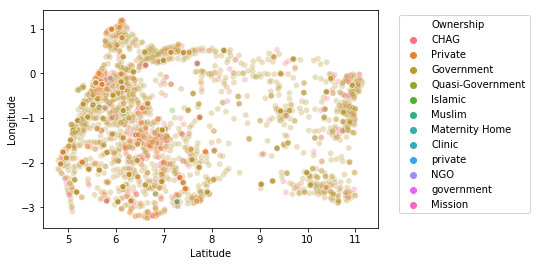

In [39]:
sns.scatterplot(x='Latitude',
               y='Longitude',
                hue='Ownership',
                alpha=0.3,
               data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [52]:
df_long_lat = df[['Latitude' , 'Longitude']]

In [56]:
list_long_lat =[]
for index,value in df_long_lat.iterrows():
    list_long_lat.append([value['Latitude'] , value['Longitude']])

In [73]:
map_hooray = folium.Map(location=[7.946527, -1.023194],
                    zoom_start = 5, min_zoom=7 , tiles='OpenStreetMap') ##'OpenStreetMap',  # 'Stamen Terrain', 'Stamen Toner', 'Mapbox Bright', 'Mapbox Control Room'
folium.CircleMarker([6.8,-1.023194],
                    radius=50,
                    popup='Homicide',
                    color='red',
                    ).add_to(map_hooray)
HeatMap(list_long_lat, radius=10).add_to(map_hooray)
map_hooray

In [97]:
map_hooray = folium.Map(location=[7.946527, -1.023194],
                    zoom_start = 5, min_zoom=7)


for i in range(len(list_long_lat)):
    if(df.iloc[i].Ownership == 'CHAG'):
        folium.Marker(
            list_long_lat[i], 
            popup = '<b>' + df.iloc[i].FacilityName + '</b>' , 
            icon = folium.Icon(color='red', icon='info-sign')               
        ).add_to(map_hooray)
map_hooray.add_child(folium.ClickForMarker(popup='Waypoint'))
map_hooray

In [95]:
m = folium.Map(
    location=[-6.1753924, 106.8271528],
    tiles='Stamen Terrain',
    zoom_start=17
)

m.add_child(folium.LatLngPopup())

m

In [96]:
m = folium.Map(
    location=[-6.1753924, 106.8271528],
    tiles='Stamen Terrain',
    zoom_start=17
)



m
